In [192]:
%matplotlib inline
from matplotlib import style, figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

lastdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdate



('2017-08-23')

In [11]:
# Calculate the date 1 year ago from the last data point in the database

firstdate = dt.date(2017,8,23) - dt.timedelta(days=365)
firstdate



datetime.date(2016, 8, 23)

In [60]:
# Perform a query to retrieve the date and precipitation scores

weatherData = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=firstdate)\
    .order_by(Measurement.date).all()
weatherData



[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [62]:
# Save the query results as a Pandas DataFrame and set the index to the date column

weatherData_df = pd.DataFrame(weatherData, columns = ["Date", "Precipitation"])

weatherData_df.set_index("Date") 


weatherData_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [64]:
# Sort the dataframe by date

weatherData_df.head()


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [65]:
weatherData_df = weatherData_df.dropna(how='any')
weatherData_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


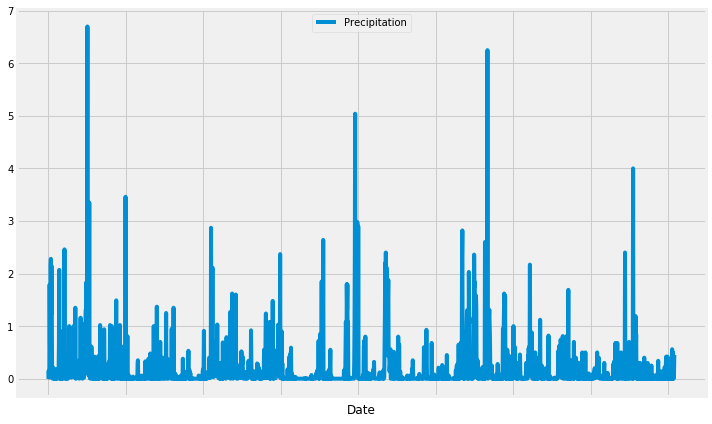

In [78]:
# Use Pandas Plotting with Matplotlib to plot the data

weatherData_df.plot("Date", "Precipitation", figsize = (10, 6))
plt.legend(loc= "upper center")
plt.tight_layout()


In [69]:
# Use Pandas to calcualte the summary statistics for the precipitation data

weatherData_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [81]:
# Design a query to show how many stations are available in this dataset?

stationCount = session.query(Station.station).count()
stationCount


9

In [94]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

topStations = session.query(Measurement.station, func.count(Measurement.prcp))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.tobs).desc())

topStations = [(station[0], station[1]) for station in topStations]
topStations
  




[('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00513117', 2696),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [122]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature at the most active station?
mostActive = topStations[0]

lowestTemp = session.query(Measurement.tobs)\
    .filter(Measurement.station == mostActive[0])\
    .order_by(Measurement.tobs)\
    .first()[0]

highestTemp = session.query(Measurement.tobs)\
    .filter(Measurement.station == mostActive[0])\
    .order_by(Measurement.tobs.desc())\
    .first()[0]

avgTemp = session.query(func.avg(Measurement.tobs))\
    .filter(Measurement.station == mostActive[0]).all()[0][0]


temps = [(lowestTemp, highestTemp, avgTemp)]
temps

[(54.0, 85.0, 71.66378066378067)]

In [126]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

lastdate = session.query(Measurement.date).filter(Measurement.station == mostActive[0])\
    .order_by(Measurement.date.desc()).first()[0]
lastdate


'2017-08-18'

In [127]:
firstdate = dt.date(2017,8,18) - dt.timedelta(days=365)
firstdate


datetime.date(2016, 8, 18)

In [142]:
temps = session.query(Measurement.tobs)\
    .filter(Measurement.date>=firstdate)\
    .filter(Measurement.station == mostActive[0])\
    .all()

temps = pd.DataFrame(temps)
temps.head()

,tobs
0,80.0
1,79.0
2,81.0
3,79.0
4,78.0


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

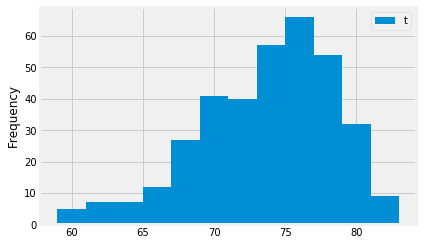

In [164]:
plt.hist(temps["tobs"], bins=12)
plt.legend("tobs",loc= "upper right")
plt.ylabel("Frequency")
plt.tight_layout


## Optional Challenge Assignment

In [165]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [169]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

temps= calc_temps("2017-08-11", "2017-08-20")
print(temps)

[(70.0, 78.34146341463415, 85.0)]


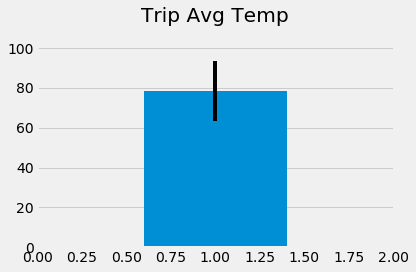

In [198]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tmin= temps[0][0]
avg_temp= temps[0][1]
tmax= temps[0][2]
peak= tmax - tmin

plt.bar(1, avg_temp)
plt.title("Trip Avg Temp")
plt.xlim(0,2)
plt.ylim(0,110)
plt.errorbar(1,avg_temps, yerr= peak, color= "black")
plt.tight_layout()
plt.grid(b=None, which='major', axis='x')
plt.show()


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
